In [40]:
import numpy as np
import pandas as pd

def count_pixel_values(pixels):
    """
    Conta a quantidade de cada valor de pixel (cada combinação de R, G, B) em uma imagem.
    """
    # Converter para um DataFrame do Pandas para facilitar a contagem
    df = pd.DataFrame(pixels, columns=['R', 'G', 'B'])

    # Contar a frequência de cada combinação de R, G, B
    pixel_counts = df.value_counts(sort=True).reset_index(name='Count')

    return pixel_counts

def reduce_color_image(image, n_colors):
    
    pixels = image.reshape(-1, 3).copy()
    
    pixel_counts = count_pixel_values(pixels)
    
    top_pixels = pixel_counts.nlargest(n_colors, 'Count')[['R', 'G', 'B']].to_numpy()
                          
    for i in range(pixels.shape[0]):
        p = pixels[i]
        new_pixel = top_pixels[np.argmin(np.linalg.norm(top_pixels - p, axis=1))]
        pixels[i] = new_pixel
        
            
    new_image = pixels.reshape(image.shape)
    return new_image



# Ler imagens

In [58]:
import cv2
from matplotlib import pyplot as plt

image_araras = cv2.imread('araras.bmp', cv2.IMREAD_COLOR)
image_F1 = cv2.imread('F1.bmp', cv2.IMREAD_COLOR)
image_green_water = cv2.imread('green-water.bmp', cv2.IMREAD_COLOR)
image_surf_51 = cv2.imread('surf_51.bmp', cv2.IMREAD_COLOR)

In [78]:

def plot(original_image, binarized_image):
    fig, axs = plt.subplots(1, 2, figsize=(13, 13))
    axs[0].imshow(original_image, cmap='gray')
    axs[0].set_title('Original')
    axs[1].imshow(binarized_image, cmap='gray')
    axs[1].set_title('Agregado de cores')
    plt.show()

# Converte BGR para RGB

In [59]:
image_araras = cv2.cvtColor(image_araras, cv2.COLOR_BGR2RGB)
image_F1 = cv2.cvtColor(image_F1, cv2.COLOR_BGR2RGB)
image_green_water = cv2.cvtColor(image_green_water, cv2.COLOR_BGR2RGB)
image_surf_51 = cv2.cvtColor(image_surf_51, cv2.COLOR_BGR2RGB)


# Image 1

In [74]:
%%time

new_image_araras = reduce_color_image(image_araras, 112233//2)

CPU times: user 34.4 s, sys: 8.04 ms, total: 34.4 s
Wall time: 34.4 s


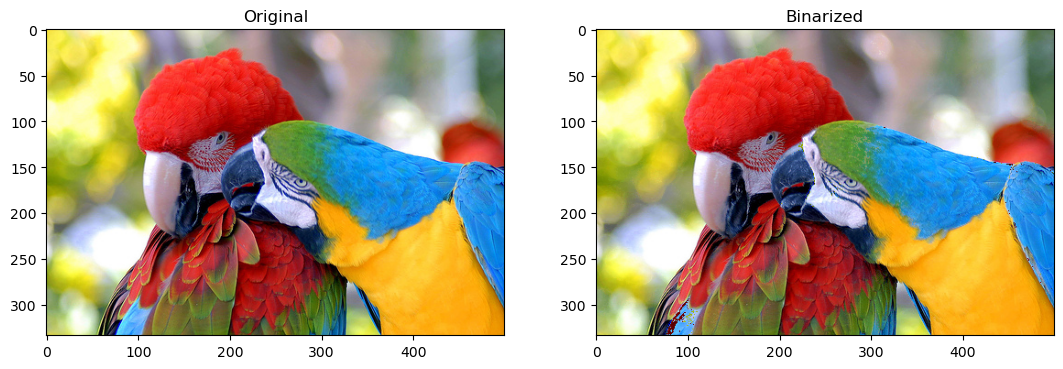

In [72]:
plot(image_araras, new_image_araras)

# Image 2

In [85]:
%%time

new_image_F1 = reduce_color_image(image_F1, 85837//2)

CPU times: user 40.4 s, sys: 52 µs, total: 40.4 s
Wall time: 40.4 s


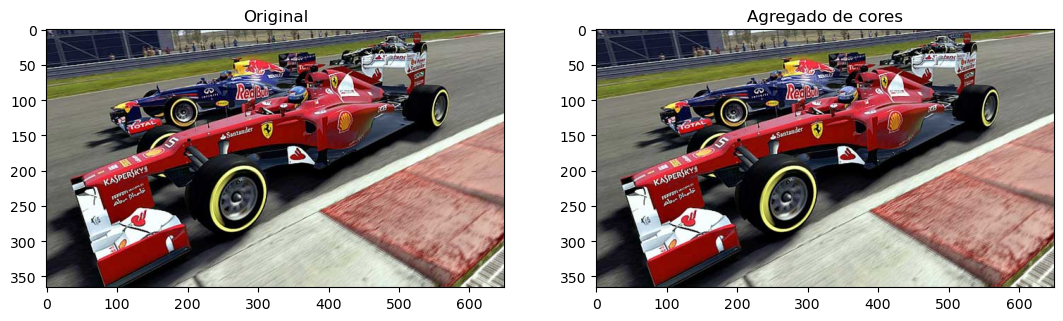

In [86]:
plot(image_F1, new_image_F1)

# Image 3

In [88]:
new_image_green_water = reduce_color_image(image_green_water, 33801//2)

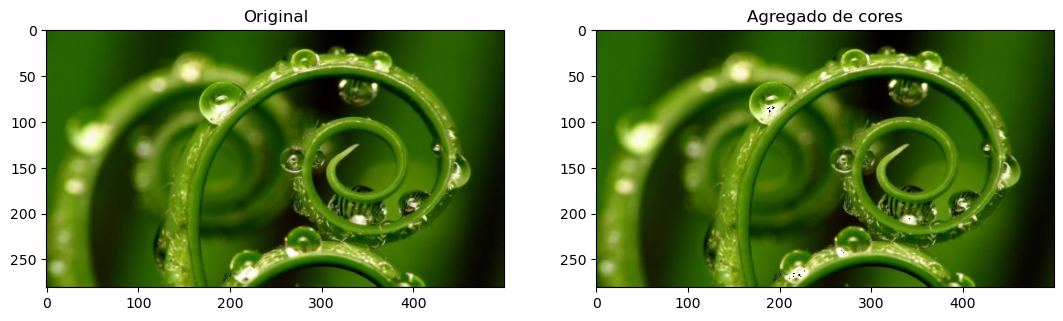

In [89]:
plot(image_green_water, new_image_green_water)

# Image 4

In [90]:
new_image_surf_51 = reduce_color_image(image_surf_51, 47229//2)

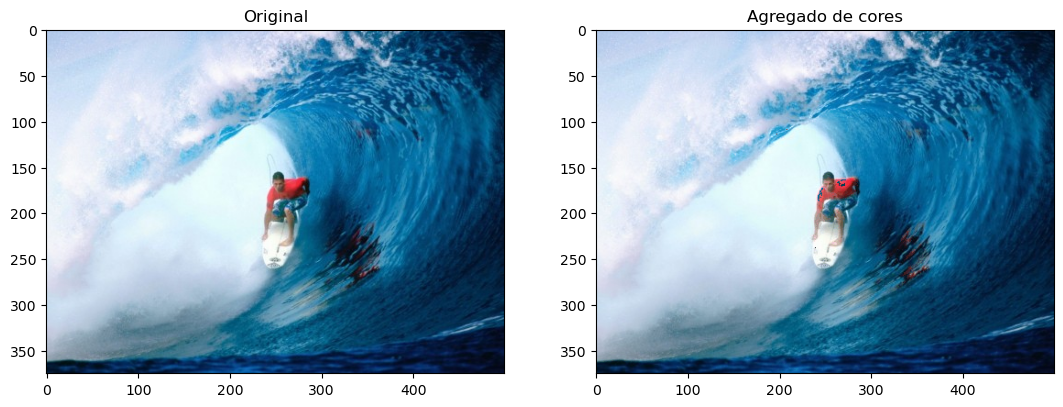

In [91]:
plot(image_surf_51, new_image_surf_51)